<a href="https://colab.research.google.com/github/GhazalehKeyvani/AnalysisComplexNetworks/blob/main/Network3_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 🔍 هدف کلی
مدل‌سازی و تحلیل نفوذ در یک شبکه‌ی گراف تصادفی با استفاده از الگوریتم‌های مرکزیت و انتشار. داده‌ی مورد استفاده، از نوع واقعی نیست بلکه از گراف تصادفی Erdős–Rényi برای نمایش الگوریتم‌ها استفاده شده.
علاوه بر آن از داده های مربوط به شبکه شهری ارتباطات تلفن همراه و داده های مربوط به شبکه ی افراد در بیت کویین و فعالیت افراد در این شبکه آورده شده .
---

### ⚙️ مراحل اجرایی

1. **ساخت گراف نمونه**
   - اطلاعات کلی مثل تعداد گره‌ها، یال‌ها و جهت‌دار بودن بررسی می‌شود.

2. **محاسبه معیارهای مرکزیت**
   - چهار معیار: Degree, Closeness, Betweenness, PageRank.
   - این معیارها نشان می‌دهند کدام گره‌ها تأثیرگذارترند.

3. **شبیه‌سازی مدل انتشار IC**
   - از گره‌های تأثیرگذار به‌عنوان "بذر" برای انتشار استفاده می‌شود.
   - انتشار در چند مرحله و با احتمال فعال‌سازی 0.1 انجام می‌شود.
   - مقایسه‌ی میانگین تأثیر با اندازه‌های مختلف بذر (5، 10، 20، ...) انجام شده.

4. **تحلیل ساختار جوامع**
   - الگوریتم Louvain برای تشخیص خوشه‌های شبکه استفاده شده.
   - شاخص‌هایی مثل modularity، اندازه جوامع، و توزیع‌شان بررسی شده‌اند.

5. **ارزیابی دقت معیارهای مرکزیت**
   - از لیست طلایی (golden list) بر اساس 100 شبیه‌سازی IC استفاده می‌شود.
   - محاسبه Precision@10 و AUC برای بررسی کیفیت مرکزیت‌ها نسبت به لیست واقعی.

6. **مصورسازی نتایج**
   - نمودارهای خطی برای نفوذ بذرها، نمودار میله‌ای برای دقت و AUC رسم شده‌اند.

7. **ذخیره‌سازی خروجی‌ها**

# Ghazaleh Keyvani


In [ ]:
!pip install pandas numpy networkx scikit-learn matplotlib cdlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Erdős–Rényi

در این نمونه کد عملاً هیچ دیتای «دنیای واقعی» بارگذاری نشده و صرفاً یک گراف تصادفی Erdős–Rényi برای نمایش الگوریتم‌ها ساخته شده:

این یعنی داده‌ی اصلی فقط همین گراف تصادفی است.

تعداد گره‌ها: 500
تعداد یال‌ها: 6162
آیا گراف جهت‌دار است؟ خیر
در حال محاسبه مرکزیت‌ها...
زمان محاسبه مرکزیت‌ها: 0.61 ثانیه

اندازه بذر: 5
Degree: تأثیر متوسط = 444.2
Closeness: تأثیر متوسط = 444.5
Betweenness: تأثیر متوسط = 445.9
PageRank: تأثیر متوسط = 440.2

اندازه بذر: 10
Degree: تأثیر متوسط = 445.7
Closeness: تأثیر متوسط = 447.6
Betweenness: تأثیر متوسط = 445.5
PageRank: تأثیر متوسط = 447.8

اندازه بذر: 20
Degree: تأثیر متوسط = 446.0
Closeness: تأثیر متوسط = 443.6
Betweenness: تأثیر متوسط = 446.6
PageRank: تأثیر متوسط = 443.3

اندازه بذر: 25
Degree: تأثیر متوسط = 446.3
Closeness: تأثیر متوسط = 442.7
Betweenness: تأثیر متوسط = 443.4
PageRank: تأثیر متوسط = 442.1

اندازه بذر: 30
Degree: تأثیر متوسط = 446.5
Closeness: تأثیر متوسط = 451.3
Betweenness: تأثیر متوسط = 445.5
PageRank: تأثیر متوسط = 446.2

تحلیل ساختار جامعه‌ها...
ماژولاریتی شبکه: 0.1662
تعداد جامعه‌ها: 12
میانگین اندازه جامعه: 41.7
بزرگترین جامعه: 88 گره
کوچکترین جامعه: 13 گره


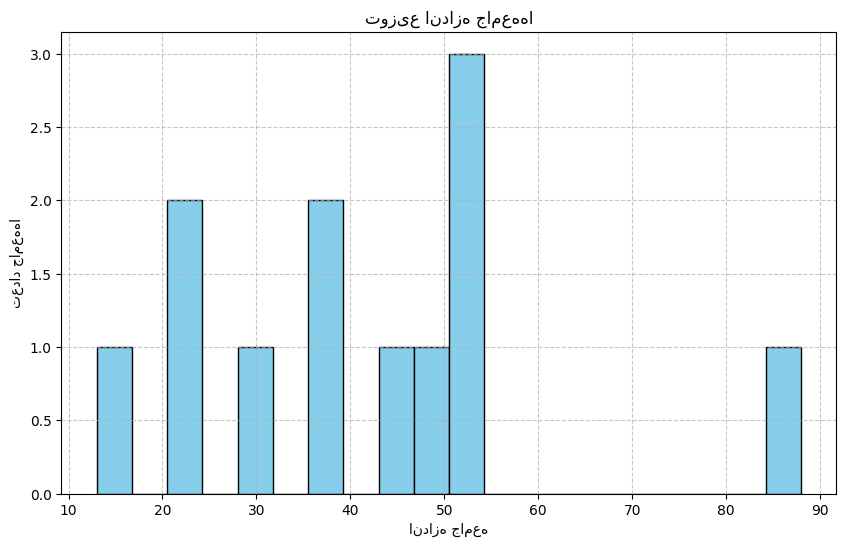


ارزیابی دقت معیارهای مرکزیت...
ایجاد لیست طلایی تأثیرگذارها...
Degree:
  Precision@10 = 1.0000
  AUC = 0.8983
Closeness:
  Precision@10 = 0.8000
  AUC = 0.8958
Betweenness:
  Precision@10 = 0.8000
  AUC = 0.7602
PageRank:
  Precision@10 = 0.9000
  AUC = 0.8967


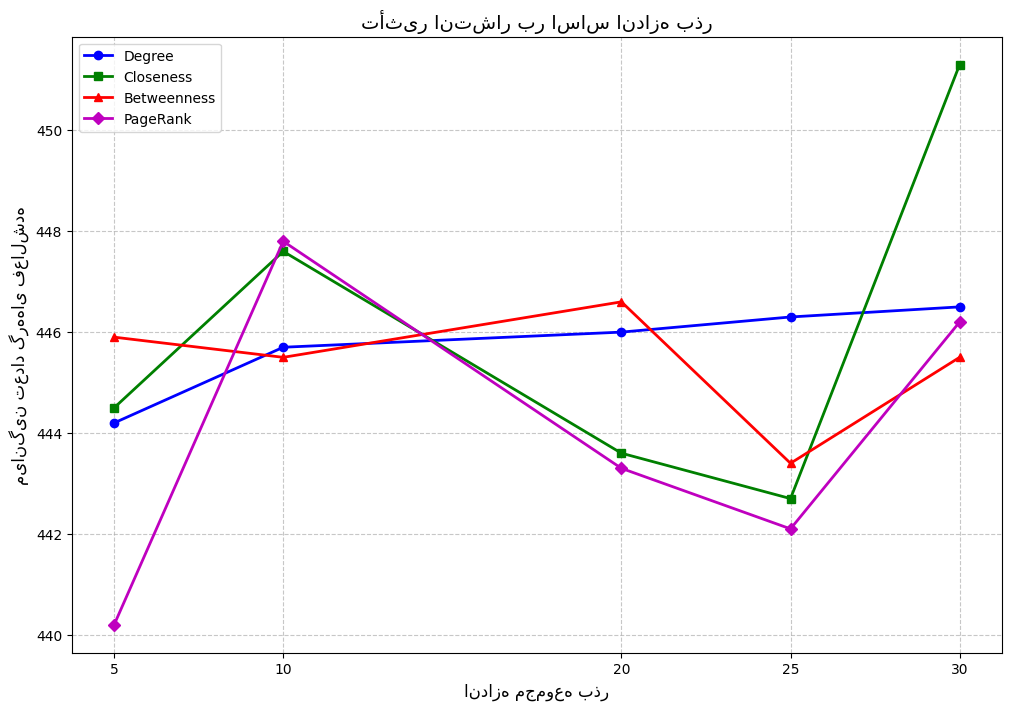

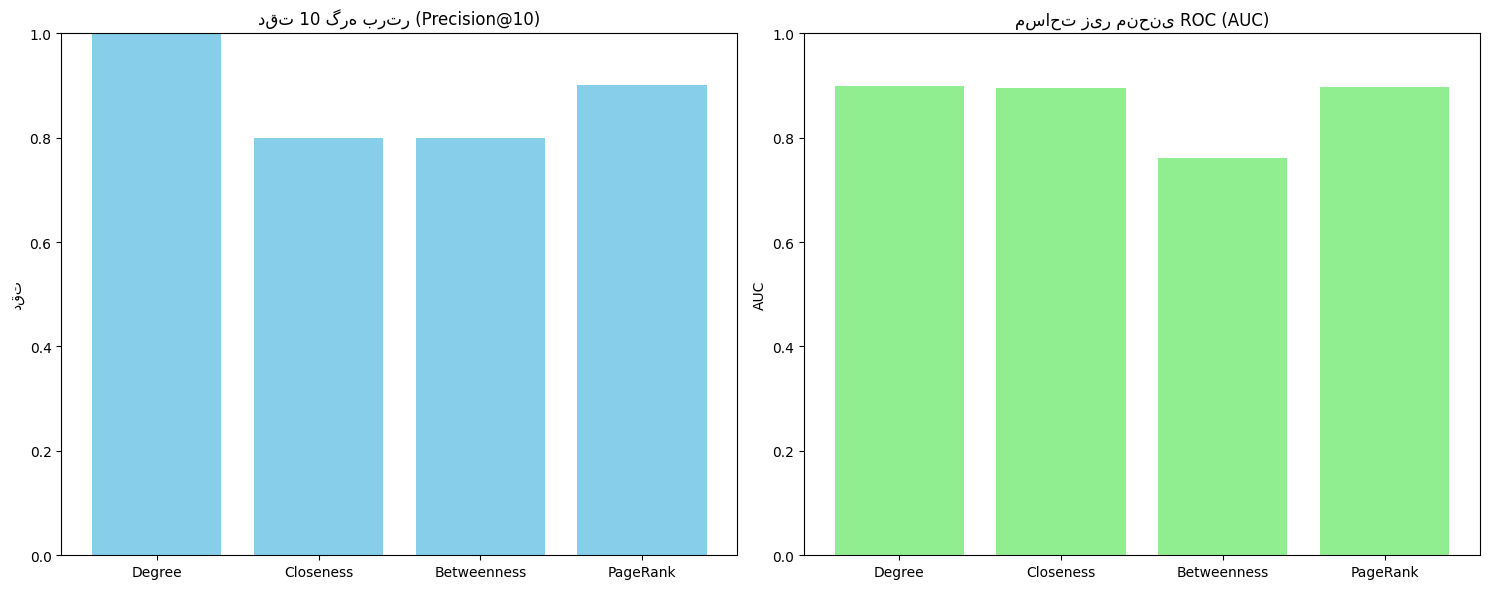

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score
from community import community_louvain
import time
import random

# 1. ایجاد گراف نمونه (در عمل از فایل خودتان بارگذاری کنید)
# G = nx.read_edgelist("your_network.edgelist")
G = nx.erdos_renyi_graph(500, 0.05, seed=42)

print(f"تعداد گره‌ها: {len(G.nodes)}")
print(f"تعداد یال‌ها: {len(G.edges)}")
print(f"آیا گراف جهت‌دار است؟ {'بله' if nx.is_directed(G) else 'خیر'}")
# 2. محاسبه معیارهای مرکزیت
def compute_centralities(graph):
    print("در حال محاسبه مرکزیت‌ها...")
    start = time.time()

    results = {
        "Degree": nx.degree_centrality(graph),
        "Closeness": nx.closeness_centrality(graph),
        "Betweenness": nx.betweenness_centrality(graph, k=min(100, len(graph)//10)),
        "PageRank": nx.pagerank(graph, alpha=0.85)
    }

    print(f"زمان محاسبه مرکزیت‌ها: {time.time()-start:.2f} ثانیه")
    return results

centralities = compute_centralities(G)

# 3. مدل انتشار IC
def independent_cascade(graph, seeds, prob=0.1, max_iter=20):
    activated = set(seeds)
    new_activated = set(seeds)

    for _ in range(max_iter):
        next_activated = set()
        for node in new_activated:
            neighbors = list(graph.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated and random.random() < prob:
                    next_activated.add(neighbor)

        if not next_activated:
            break

        activated |= next_activated
        new_activated = next_activated

    return activated

# 4. محاسبه تأثیر انتشار
def compute_influence_spread(graph, centralities, seed_sizes, num_simulations=10):
    results = {}

    for size in seed_sizes:
        print(f"\nاندازه بذر: {size}")
        for name, cent_dict in centralities.items():
            # انتخاب گره‌های برتر
            top_nodes = sorted(cent_dict, key=cent_dict.get, reverse=True)[:size]

            # اجرای شبیه‌سازی‌ها
            total_spread = 0
            for _ in range(num_simulations):
                activated = independent_cascade(graph, top_nodes)
                total_spread += len(activated)

            avg_spread = total_spread / num_simulations
            results[(name, size)] = avg_spread
            print(f"{name}: تأثیر متوسط = {avg_spread:.1f}")

    return results

seed_sizes = [5, 10, 20, 25, 30]
influence_results = compute_influence_spread(G, centralities, seed_sizes)

# 5. تحلیل جامعه‌ها
def community_analysis(graph):
    print("\nتحلیل ساختار جامعه‌ها...")

    # تشخیص جامعه‌ها با الگوریتم لوین
    partition = community_louvain.best_partition(graph)
    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, []).append(node)

    # محاسبه ماژولاریتی
    modularity = community_louvain.modularity(partition, graph)
    print(f"ماژولاریتی شبکه: {modularity:.4f}")

    # تحلیل اندازه جامعه‌ها
    comm_sizes = [len(comm) for comm in communities.values()]
    print(f"تعداد جامعه‌ها: {len(communities)}")
    print(f"میانگین اندازه جامعه: {np.mean(comm_sizes):.1f}")
    print(f"بزرگترین جامعه: {max(comm_sizes)} گره")
    print(f"کوچکترین جامعه: {min(comm_sizes)} گره")

    # مصورسازی توزیع اندازه جامعه‌ها
    plt.figure(figsize=(10, 6))
    plt.hist(comm_sizes, bins=20, color='skyblue', edgecolor='black')
    plt.title('توزیع اندازه جامعه‌ها')
    plt.xlabel('اندازه جامعه')
    plt.ylabel('تعداد جامعه‌ها')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    return communities, modularity

communities, mod_value = community_analysis(G)

# 6. ارزیابی دقت معیارها
def evaluate_centralities(graph, centralities):
    print("\nارزیابی دقت معیارهای مرکزیت...")

    # ایجاد لیست طلایی نودهای تأثیرگذار
    print("ایجاد لیست طلایی تأثیرگذارها...")
    all_nodes = list(graph.nodes())
    seed_size = int(len(graph) * 0.05)  # 5% گره‌ها به عنوان بذر
    true_influential = set()
    activation_counts = {node: 0 for node in graph.nodes()}

    for _ in range(100):
        seeds = random.sample(all_nodes, seed_size)
        activated = independent_cascade(graph, seeds)
        for node in activated:
            activation_counts[node] += 1

    # انتخاب 20% گره‌های با بیشترین تعداد فعال‌سازی
    sorted_nodes = sorted(activation_counts, key=activation_counts.get, reverse=True)
    top_percentage = int(len(graph) * 0.2)
    true_influential = set(sorted_nodes[:top_percentage])

    # ارزیابی معیارها
    precision_results = {}
    auc_results = {}

    for name, cent_dict in centralities.items():
        # انتخاب 10 گره برتر
        top_nodes = sorted(cent_dict, key=cent_dict.get, reverse=True)[:10]

        # محاسبه Precision@10
        true_positives = len([node for node in top_nodes if node in true_influential])
        precision = true_positives / 10
        precision_results[name] = precision

        # محاسبه AUC
        y_true = [1 if node in true_influential else 0 for node in graph.nodes()]
        y_score = [cent_dict[node] for node in graph.nodes()]
        auc = roc_auc_score(y_true, y_score)
        auc_results[name] = auc

        print(f"{name}:")
        print(f"  Precision@10 = {precision:.4f}")
        print(f"  AUC = {auc:.4f}")

    return precision_results, auc_results

precisions, aucs = evaluate_centralities(G, centralities)

# 7. مصورسازی نتایج
def visualize_results(influence_results, precisions, aucs):
    # مصورسازی تأثیر انتشار
    plt.figure(figsize=(12, 8))
    markers = ['o', 's', '^', 'D']
    colors = ['b', 'g', 'r', 'm']

    for i, name in enumerate(centralities.keys()):
        x = seed_sizes
        y = [influence_results[(name, size)] for size in seed_sizes]
        plt.plot(x, y, marker=markers[i], color=colors[i], label=name, linewidth=2)

    plt.title('تأثیر انتشار بر اساس اندازه بذر', fontsize=14)
    plt.xlabel('اندازه مجموعه بذر', fontsize=12)
    plt.ylabel('میانگین تعداد گره‌های فعال‌شده', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(seed_sizes)
    plt.show()

    # مصورسازی دقت
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Precision@10
    ax1.bar(precisions.keys(), precisions.values(), color='skyblue')
    ax1.set_title('دقت 10 گره برتر (Precision@10)')
    ax1.set_ylabel('دقت')
    ax1.set_ylim(0, 1)

    # AUC
    ax2.bar(aucs.keys(), aucs.values(), color='lightgreen')
    ax2.set_title('مساحت زیر منحنی ROC (AUC)')
    ax2.set_ylabel('AUC')
    ax2.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

visualize_results(influence_results, precisions, aucs)



# مجموعه داده اول

[Mobile phone activity in a city](https://www.kaggle.com/datasets/marcodena/mobile-phone-activity)

Number of Nodes:  110
Number of Edges: 1889
Is the graph directed? no

Top provinces based on centrality criteria:

Degree Centrality:
Asti: 0.5505
Vibo Valentia: 0.5505
Enna: 0.5505

Betweenness Centrality:
Taranto: 0.2424
Ragusa: 0.2387
Lecce: 0.2227

Closeness Centrality:
Vibo Valentia: 0.3445
Enna: 0.3445
Oristano: 0.3445

PageRank Centrality:
Torino: 0.0148
Roma: 0.0146
Varese: 0.0144


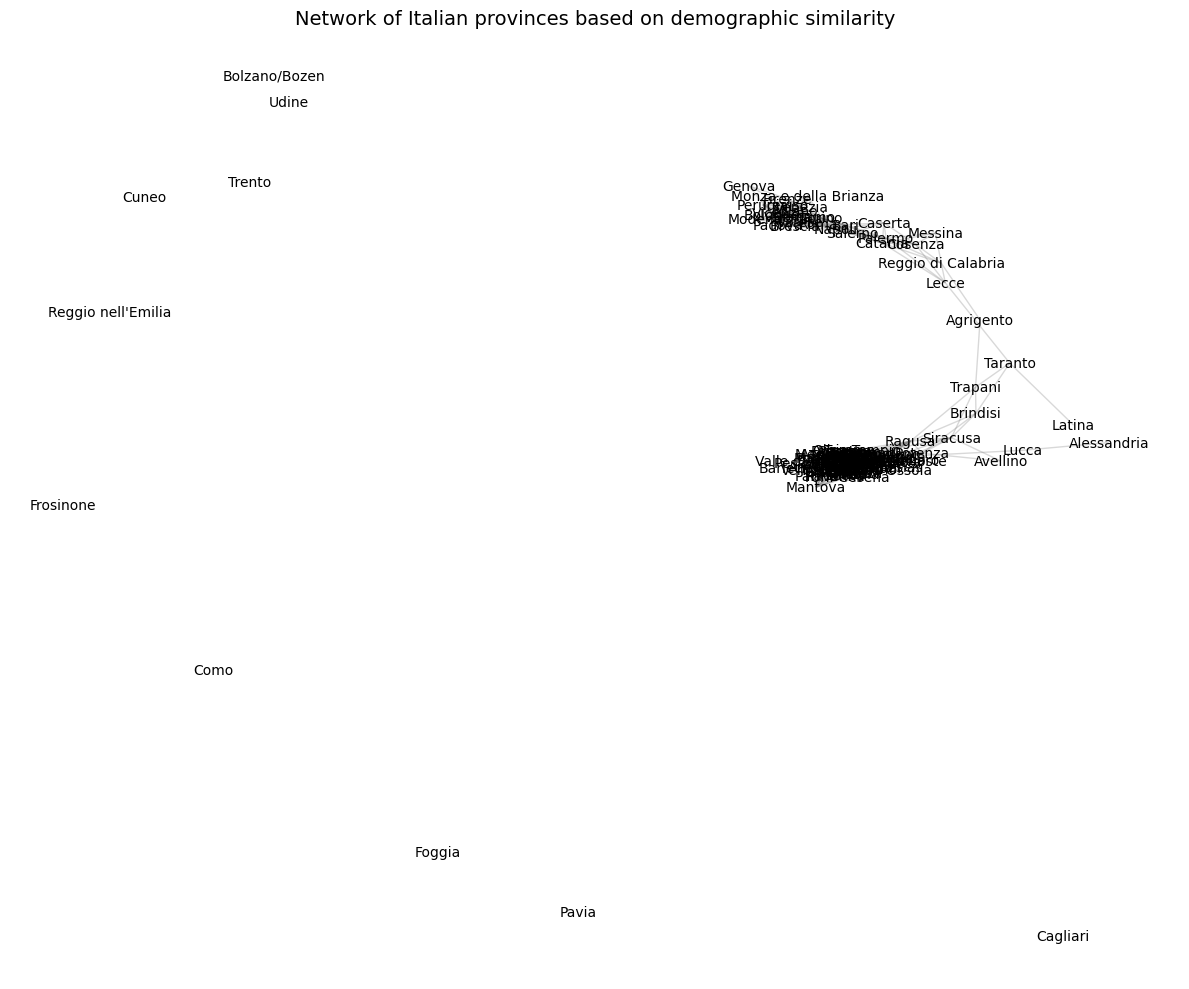


 Distribution of communities:
Community 1: 69 province
 - Cremona, Viterbo, Siracusa, Rimini, Parma, Piacenza, Matera, Mantova, Grosseto, Forlì-Cesena, Enna, L'Aquila, Pesaro e Urbino, Chieti, Ogliastra, Isernia, Pisa, Pescara, Catanzaro, Nuoro, Pistoia, Campobasso, Gorizia, Potenza, Siena, Vibo Valentia, Livorno, Valle d'Aosta/Vallée d'Aoste, Brindisi, Verbano-Cusio-Ossola, Trapani, Novara, Benevento, Agrigento, Rieti, Ascoli Piceno, Medio Campidano, Crotone, Massa-Carrara, Lodi, Savona, Imperia, Macerata, Ferrara, La Spezia, Avellino, Ragusa, Vercelli, Ancona, Fermo, Asti, Sassari, Terni, Olbia-Tempio, Barletta-Andria-Trani, Prato, Arezzo, Trieste, Pordenone, Rovigo, Teramo, Carbonia-Iglesias, Biella, Sondrio, Oristano, Caltanissetta, Lecco, Belluno, Ravenna
Community 2: 29 province
 - Brescia, Verona, Latina, Perugia, Palermo, Messina, Monza e della Brianza, Treviso, Napoli, Milano, Vicenza, Taranto, Cosenza, Salerno, Venezia, Lecce, Reggio di Calabria, Varese, Roma, Genova, Casert

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import re

# داده‌های نمونه شما
# data = """
# PROVINCIA,P1,P2,P3,P4,P5,P6,P7,P8,P9
# Alessandria,427229,204983,222246,158222,198253,11481,44582,14691,85839
# Asti,217573,105370,112203,82119,102538,5404,20767,6745,44773
# Biella,182192,86821,95371,69188,82431,5266,18474,6833,37017
# Cuneo,586378,287786,298592,231452,276983,12473,49417,16053,127243
# Novara,365559,176361,189198,143302,170741,9351,31811,10354,76929
# Torino,2247780,1081298,1166482,881971,1041312,63811,186549,74137,468707
# """

# تبدیل رشته به DataFrame
from io import StringIO
df = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/ISTAT_census_variables_2011.csv')

# تابع برای تمیز کردن داده‌های عددی
def clean_numeric(value):
    if isinstance(value, str):
        # حذف کاراکترهای غیرعددی به جز نقطه و منفی
        cleaned = re.sub(r'[^\d.]', '', value)
        return float(cleaned) if cleaned else 0.0
    return value

# تمیز کردن تمام ستون‌های عددی
for col in df.columns[1:]:
    df[col] = df[col].apply(clean_numeric)

# پر کردن مقادیر خالی
#df = df.fillna(df.mean())

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
numeric_cols = df.columns[1:]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# محاسبه ماتریس شباهت
similarity_matrix = cosine_similarity(df[numeric_cols])

# ایجاد گراف
G = nx.Graph()


# افزودن گره‌ها با ویژگی‌ها
for idx, row in df.iterrows():
    attributes = {col: row[col] for col in numeric_cols}
    G.add_node(row['PROVINCIA'], **attributes)

# افزودن یال‌ها با وزن شباهت
threshold = 0.7  # آستانه شباهت برای ایجاد ارتباط
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if similarity_matrix[i,j] > threshold:
            G.add_edge(df.iloc[i]['PROVINCIA'],
                      df.iloc[j]['PROVINCIA'],
                      weight=similarity_matrix[i,j])

# محاسبه معیارهای مرکزیت
centralities = {
    'Degree': nx.degree_centrality(G),
    'Betweenness': nx.betweenness_centrality(G),
    'Closeness': nx.closeness_centrality(G),
    'PageRank': nx.pagerank(G)
}

print(f"Number of Nodes:  {len(G.nodes)}")
print(f"Number of Edges: {len(G.edges)}")
print(f"Is the graph directed? {'yes' if nx.is_directed(G) else 'no'}")
# نمایش نتایج
print("\nTop provinces based on centrality criteria:")
for metric, values in centralities.items():
    print(f"\n{metric} Centrality:")
    sorted_provinces = sorted(values.items(), key=lambda x: x[1], reverse=True)[:3]
    for province, score in sorted_provinces:
        print(f"{province}: {score:.4f}")

# مصورسازی شبکه
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

# تنظیم اندازه گره‌ها بر اساس جمعیت
populations = df.set_index('PROVINCIA')['P1'].to_dict()
node_sizes = [populations[node] * 0.0005 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Network of Italian provinces based on demographic similarity", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# تحلیل جوامع
from networkx.algorithms import community
communities = list(community.greedy_modularity_communities(G))

print("\n Distribution of communities:")
for i, comm in enumerate(communities):
  print(f"Community {i+1}: {len(comm)} province")
  print(" - " + ", ".join(comm))

در حال خواندن و پیش‌پردازش داده‌ها...
ایجاد گراف شباهت...
تعداد گره‌ها: 110
تعداد یال‌ها: 1889
محاسبه معیارهای مرکزیت...

Degree Centrality - Top 5 Provinces:
Asti: 0.5505
Vibo Valentia: 0.5505
Enna: 0.5505
Oristano: 0.5505
Biella: 0.5413

Betweenness Centrality - Top 5 Provinces:
Taranto: 0.2424
Ragusa: 0.2387
Lecce: 0.2227
Trapani: 0.1872
Brindisi: 0.1604

Closeness Centrality - Top 5 Provinces:
Vibo Valentia: 0.3445
Enna: 0.3445
Oristano: 0.3445
Benevento: 0.3432
Sondrio: 0.3419

PageRank Centrality - Top 5 Provinces:
Torino: 0.0148
Roma: 0.0146
Varese: 0.0144
Bergamo: 0.0143
Brescia: 0.0138
تحلیل انتشار اطلاعات...
تحلیل جوامع...
پیش‌بینی لینک...
مصورسازی نتایج...
  - ایجاد مصورسازی جوامع...


(np.float64(-0.8899347563256883),
 np.float64(0.4389060218415389),
 np.float64(-1.0812094194601616),
 np.float64(0.7053978086633951))

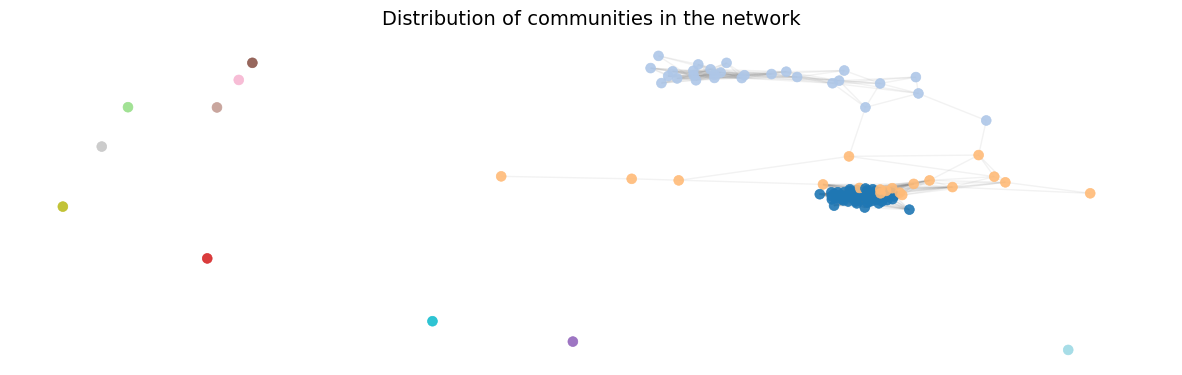

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score
import random
from cdlib import algorithms
import re
import warnings

# تنظیمات اولیه
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'  # پشتیبانی از حروف فارسی
plt.rcParams['axes.unicode_minus'] = False

# --- 1. خواندن و پیش‌پردازش داده‌ها ---
print("در حال خواندن و پیش‌پردازش داده‌ها...")
df = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/ISTAT_census_variables_2011.csv')

# تابع برای تمیز کردن داده‌های عددی
def clean_numeric(value):
    if isinstance(value, str):
        cleaned = re.sub(r'[^\d.]', '', value)
        return float(cleaned) if cleaned else 0.0
    return value

# تمیز کردن تمام ستون‌های عددی
for col in df.columns[1:]:
    df[col] = df[col].apply(clean_numeric)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
numeric_cols = df.columns[1:]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols].fillna(0))

# --- 2. ایجاد گراف شباهت ---
print("ایجاد گراف شباهت...")
similarity_matrix = cosine_similarity(df[numeric_cols])
G = nx.Graph()

# افزودن گره‌ها با ویژگی‌ها
for idx, row in df.iterrows():
    attributes = {col: row[col] for col in numeric_cols}
    G.add_node(row['PROVINCIA'], **attributes)

# افزودن یال‌ها با وزن شباهت
threshold = 0.7
edge_count = 0
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(
                df.iloc[i]['PROVINCIA'],
                df.iloc[j]['PROVINCIA'],
                weight=similarity_matrix[i, j]
            )
            edge_count += 1

print(f"تعداد گره‌ها: {len(G.nodes)}")
print(f"تعداد یال‌ها: {edge_count}")

# --- 3. محاسبه معیارهای مرکزیت ---
print("محاسبه معیارهای مرکزیت...")
centralities = {
    'Degree': nx.degree_centrality(G),
    'Betweenness': nx.betweenness_centrality(G, normalized=True, seed=42),
    'Closeness': nx.closeness_centrality(G),
    'PageRank': nx.pagerank(G, alpha=0.85)
}

# نمایش استان‌های برتر
top_provinces = {}
for metric, values in centralities.items():
    top = sorted(values.items(), key=lambda x: x[1], reverse=True)[:5]
    top_provinces[metric] = [p[0] for p in top]

    print(f"\n{metric} Centrality - Top 5 Provinces:")
    for province, score in top:
        print(f"{province}: {score:.4f}")

# --- 4. پیاده‌سازی مدل‌های انتشار ---
def IC_model(G, seed_set, p=0.1, max_iter=100):
    active = set(seed_set)
    new_active = set(seed_set)

    for _ in range(max_iter):
        next_active = set()
        for node in new_active:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in active and random.random() < p:
                    next_active.add(neighbor)

        if not next_active:
            break

        active |= next_active
        new_active = next_active

    return active

def LT_model(G, seed_set, max_iter=100):
    active = set(seed_set)
    thresholds = {node: random.uniform(0.3, 0.7) for node in G.nodes()}

    for _ in range(max_iter):
        new_active = set()
        for node in set(G.nodes()) - active:
            neighbors = list(G.neighbors(node))
            active_neighbors = [n for n in neighbors if n in active]
            if not active_neighbors:
                continue

            influence = sum(G[node][nbr].get('weight', 1) for nbr in active_neighbors)
            total_weight = sum(G[node][nbr].get('weight', 1) for nbr in neighbors)

            if total_weight > 0 and influence / total_weight > thresholds[node]:
                new_active.add(node)

        if not new_active:
            break

        active |= new_active

    return active

# --- 5. تحلیل انتشار اطلاعات ---
print("تحلیل انتشار اطلاعات...")
def run_diffusion_analysis(G, centralities, seed_sizes, num_runs=5):
    results = []

    for centrality_name, centrality in centralities.items():
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

        for size in seed_sizes:
            seed_set = [node for node, _ in sorted_nodes[:size]]

            # اجرای مدل IC
            ic_spread = 0
            for _ in range(num_runs):
                activated = IC_model(G, seed_set)
                ic_spread += len(activated)
            ic_spread /= num_runs

            # اجرای مدل LT
            lt_spread = 0
            for _ in range(num_runs):
                activated = LT_model(G, seed_set)
                lt_spread += len(activated)
            lt_spread /= num_runs

            results.append({
                'Centrality': centrality_name,
                'Seed Size': size,
                'IC Spread': ic_spread,
                'LT Spread': lt_spread
            })

    return pd.DataFrame(results)

# پارامترهای تحلیل
seed_sizes = [5, 10, 20, 25, 30]
diffusion_results = run_diffusion_analysis(G, centralities, seed_sizes)

# --- 6. تحلیل جوامع ---
print("تحلیل جوامع...")
def community_analysis(G):
    # استفاده از الگوریتم Louvain برای تشخیص جوامع
    louvain_communities = algorithms.louvain(G)
    modularity = louvain_communities.newman_girvan_modularity().score

    # محاسبه اندازه جوامع
    community_sizes = [len(c) for c in louvain_communities.communities]

    # ایجاد نقشه جامعه برای هر گره
    node_community = {}
    for i, comm in enumerate(louvain_communities.communities):
        for node in comm:
            node_community[node] = i

    return {
        'Modularity': modularity,
        'Num Communities': len(louvain_communities.communities),
        'Community Sizes': community_sizes,
        'Communities': louvain_communities.communities,
        'Node Community': node_community
    }

community_results = community_analysis(G)

# --- 7. پیش‌بینی لینک ---
print("پیش‌بینی لینک...")
def link_prediction(G, test_ratio=0.1, top_k=100):
    # تقسیم یال‌ها به آموزش و تست
    edges = list(G.edges())
    train_edges, test_edges = train_test_split(edges, test_size=test_ratio, random_state=42)

    # ایجاد گراف آموزش
    train_G = G.copy()
    train_G.remove_edges_from(test_edges)

    # تولید جفت‌های غیر مرتبط برای تست
    all_possible_edges = [(u, v) for u in G.nodes for v in G.nodes if u != v and not G.has_edge(u, v)]
    test_non_edges = random.sample(all_possible_edges, min(len(test_edges), len(all_possible_edges)))
    # محاسبه امتیاز تشابه برای جفت‌ها
    all_pairs = test_edges + test_non_edges
    labels = [1]*len(test_edges) + [0]*len(test_non_edges)

    # محاسبه معیارهای تشابه
    scores = []
    for u, v in all_pairs:
        try:
            # Common Neighbors
            cn = len(list(nx.common_neighbors(train_G, u, v)))
            # Jaccard Coefficient
            jc = list(nx.jaccard_coefficient(train_G, [(u, v)]))[0][2]
            # Adamic-Adar Index
            aai = list(nx.adamic_adar_index(train_G, [(u, v)]))[0][2]

            # میانگین معیارها
            score = (cn + jc + aai) / 3
            scores.append(score)
        except:
            scores.append(0)

    # محاسبه AUC
    auc = roc_auc_score(labels, scores)

    # محاسبه Precision@k
    top_indices = np.argsort(scores)[-top_k:]
    top_labels = [labels[i] for i in top_indices]
    precision = sum(top_labels) / len(top_labels)

    return {'AUC': auc, 'Precision': precision}

prediction_results = link_prediction(G)

# --- 8. مصورسازی نتایج در ردیف‌های مجزا ---
print("مصورسازی نتایج...")
plt.figure(figsize=(15, 25))

# 1. مصورسازی شبکه با رنگ‌بندی جوامع
plt.subplot(5, 1, 1)
print("  - ایجاد مصورسازی جوامع...")
pos = nx.spring_layout(G, seed=42, k=0.15)
node_colors = [community_results['Node Community'].get(node, -1) for node in G.nodes()]

nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=50,
    cmap=plt.cm.tab20,
    alpha=0.9
)
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
plt.title("Distribution of communities in the network", fontsize=14)
plt.axis('off')





  - ایجاد نمودار انتشار...


([<matplotlib.axis.XTick at 0x7fdcdb937790>,
 [Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30')])

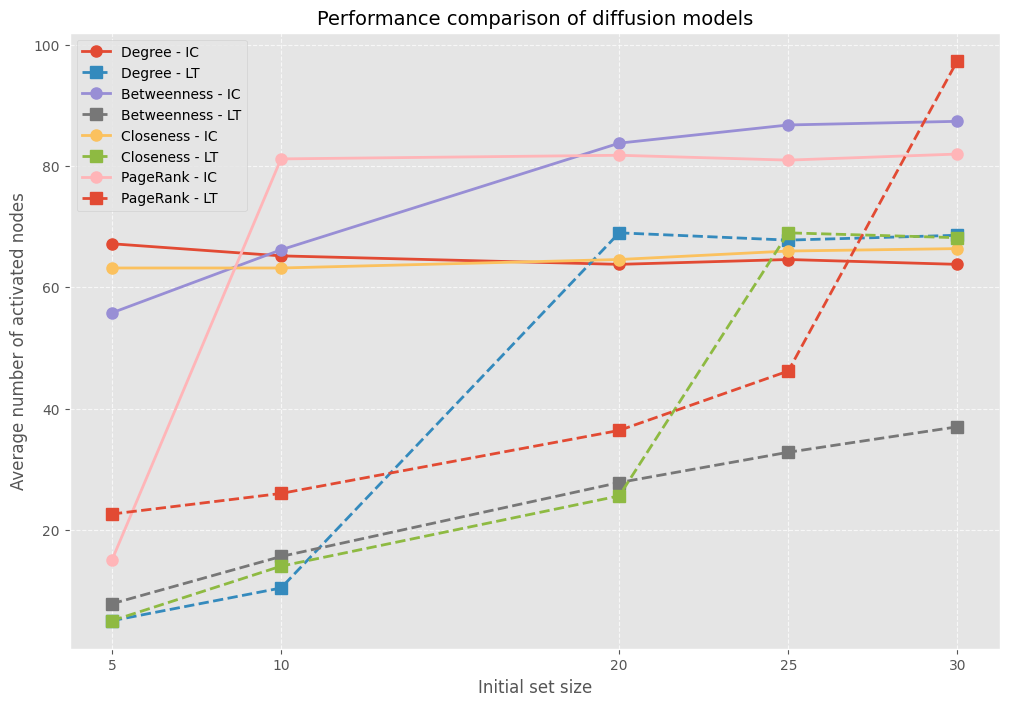

In [ ]:
# 2. مقایسه عملکرد مدل‌های انتشار
#plt.subplot(5, 1, 2)
print("  - ایجاد نمودار انتشار...")
plt.figure(figsize=(12, 8))
for centrality in centralities.keys():
    subset = diffusion_results[diffusion_results['Centrality'] == centrality]
    plt.plot(subset['Seed Size'], subset['IC Spread'], 'o-', linewidth=2, markersize=8, label=f'{centrality} - IC')
    plt.plot(subset['Seed Size'], subset['LT Spread'], 's--', linewidth=2, markersize=8, label=f'{centrality} - LT')

plt.xlabel('Initial set size', fontsize=12)
plt.ylabel('Average number of activated nodes', fontsize=12)
plt.title('Performance comparison of diffusion models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(seed_sizes)

  - ایجاد نمودار توزیع مرکزیت...


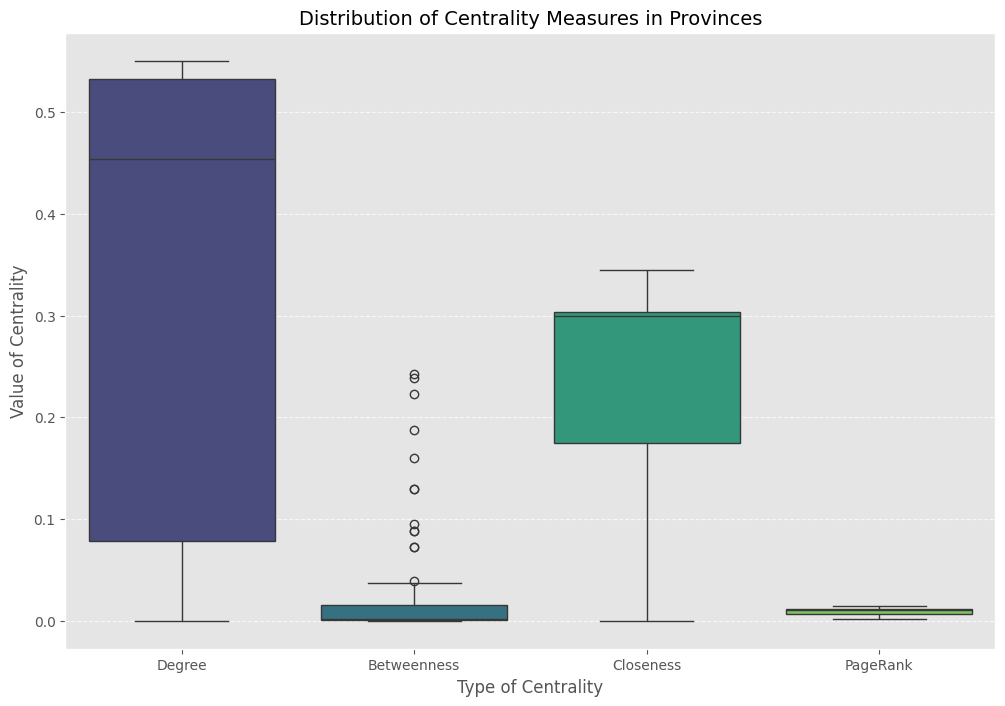

In [ ]:
# 3. نمایش توزیع معیارهای مرکزیت
#plt.subplot(5, 1, 3)
print("  - ایجاد نمودار توزیع مرکزیت...")
centrality_data = []
for metric, values in centralities.items():
    for province, score in values.items():
        centrality_data.append({'Province': province, 'Centrality': metric, 'Score': score})

centrality_df = pd.DataFrame(centrality_data)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Centrality', y='Score', data=centrality_df, palette='viridis')
plt.title('Distribution of Centrality Measures in Provinces', fontsize=14)
plt.xlabel('Type of Centrality', fontsize=12)
plt.ylabel('Value of Centrality', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)




  - ایجاد نمودار پیش‌بینی لینک...


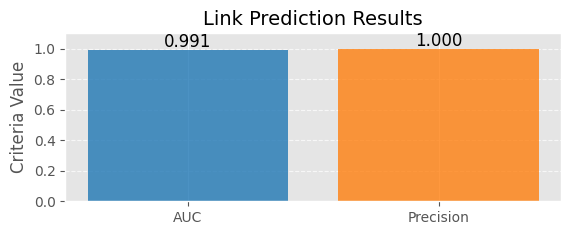

In [ ]:
# 4. نمایش نتایج پیش‌بینی لینک
plt.subplot(2, 1, 2)
print("  - ایجاد نمودار پیش‌بینی لینک...")
metrics = ['AUC', 'Precision']
values = [prediction_results['AUC'], prediction_results['Precision']]
colors = ['#1f77b4', '#ff7f0e']

plt.bar(metrics, values, color=colors, alpha=0.8)
plt.ylim(0, 1.1)
plt.title('Link Prediction Results', fontsize=14)
plt.ylabel('Criteria Value', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=12)



  - ایجاد نمودار توزیع جوامع...


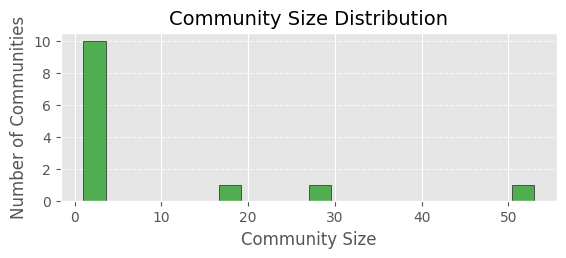

In [ ]:
# 5. نمایش توزیع اندازه جوامع
plt.subplot(2, 1, 2)
print("  - ایجاد نمودار توزیع جوامع...")
sizes = community_results['Community Sizes']
plt.hist(sizes, bins=20, color='#2ca02c', edgecolor='black', alpha=0.8)
plt.title('Community Size Distribution', fontsize=14)
plt.xlabel('Community Size', fontsize=12)
plt.ylabel('Number of Communities', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

In [ ]:

# --- خروجی نتایج ---
print("\n\n" + "="*50)
print("خلاصه نتایج پروژه")
print("="*50)



# 3. پیش‌بینی لینک
print("\n3. پیش‌بینی لینک:")
print(f"- AUC: {prediction_results['AUC']:.4f}")
print(f"- Precision: {prediction_results['Precision']:.4f}")

# 4. استان‌های برتر
print("\n4. استان‌های برتر بر اساس معیارهای مرکزیت:")
for metric, provinces in top_provinces.items():
    print(f"\n{metric}:")
    print(", ".join(provinces))



خلاصه نتایج پروژه

3. پیش‌بینی لینک:
- AUC: 0.9904
- Precision: 1.0000

4. استان‌های برتر بر اساس معیارهای مرکزیت:

Degree:
Asti, Vibo Valentia, Enna, Oristano, Biella

Betweenness:
Taranto, Ragusa, Lecce, Trapani, Brindisi

Closeness:
Vibo Valentia, Enna, Oristano, Benevento, Sondrio

PageRank:
Torino, Roma, Varese, Bergamo, Brescia


## تحلیل نتایج شبکه استان‌ها

## نمای کلی شبکه

- 110 گره و 1889 یال، گراف بدون جهت  
- میانگین درجه تقریباً 34 (هر استان به 34 استان دیگر وصل است)  
- چگالی نسبتاً بالا؛ اکثر استان‌ها حداقل چند ده همسایهٔ پروفایل‌مشابه دارند  

## Degree Centrality

- سه استان Asti، Vibo Valentia و Enna هرکدام مقدار 0.5505  
- این استان‌ها بیشترین تعداد ارتباط مستقیم (همسایهٔ پروفایل‌مشابه) را دارند  
- برای پخش سریع یک پیام، انتخاب این گره‌ها به عنوان نقطهٔ شروع مناسب است  

## Betweenness Centrality

- Taranto (0.2424)، Ragusa (0.2387)، Lecce (0.2227)  
- نقش «پل» یا واسطه میان خوشه‌های مختلف را ایفا می‌کنند  
- حذف یا اختلال در این گره‌ها باعث گسست بخش‌های زیادی از شبکه می‌شود  

## Closeness Centrality

- Vibo Valentia، Enna و Oristano هر کدام مقدار 0.3445  
- کمترین میانگین فاصله تا بقیهٔ گره‌ها را دارند و در مرکز توپولوژیک شبکه قرار گرفته‌اند  
- بهترین گزینه‌ها برای شروع کمپین‌هایی که هدف پوشش کل شبکه است  

## PageRank Centrality

- Torino (0.0148)، Roma (0.0146)، Varese (0.0144)  
- این معیار وزن روابط همسایگی را در نظر می‌گیرد و مراکز جمعیتی–اقتصادی بزرگ را برجسته می‌کند  
- مناسب برای شناسایی استان‌هایی با تأثیر بلندمدت و پایدار در شبکه  

## ساختار جوامع

- جامعه ١: 69 استان شامل ترکیبی از مناطق مرکزی و حاشیه‌ای  
- جامعه ٢: 29 استان، اغلب کلان‌شهرها و مراکز اقتصادی (Milano, Roma, Napoli, Torino و…)  
- جوامع ٣ تا ١٣: هر کدام استان یا دو استان با پروفایل بسیار متمایز (کوهستانی، جزیره‌ای، خودمختار)  
- 11 جامعهٔ تک‌عضوی نشان‌دهندهٔ وجود استان‌های «بی‌همتا» با ویژگی‌های منحصربه‌فرد است  

## نتیجه‌گیری و کاربردها

- برای **انتشار سریع** اطلاعات، گره‌هایی با Closeness و Degree بالا را به‌عنوان بذر انتخاب کنید (مثلاً Asti, Enna, Vibo Valentia).  
- برای **کمپین‌های تبلیغاتی** یا معرفی محصول، تمرکز بر استان‌های با PageRank بالا (Torino, Roma) بیشترین دسترسی بلندمدت را فراهم می‌کند.  
- برای **نظارت و امنیت** مسیرهای ارتباطی، روی گره‌های Betweenness بالا (Taranto, Ragusa, Lecce) نظارت خاص اعمال کنید.  
- از خوشه‌بندی استفاده کنید تا **تحلیل منطقه‌ای** انجام دهید؛ اما تفکیک واقعی‌تر نیازمند تنظیم آستانه یا الگوریتم خوشه‌یابی پیشرفته‌تر است.

# مجموعه داده ی دوم

[The Elliptic Data Set maps Bitcoin transactions to real entities belonging to licit categories](https://www.kaggle.com/datasets/ellipticco/elliptic-data-set)

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
import pandas as pd

# تعداد ستون‌ها در فایل: 166 ویژگی + 1 شناسه = 167
num_features = 166
columns = ['txId'] + [f'feature_{i}' for i in range(1, num_features + 1)]

txs = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_features.csv',
                  header=None, names=columns, index_col='txId')
print(txs.columns)
classes   = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv', index_col='txId')
print(classes.columns)
edgelist  = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

# به‌صورت اختیاری: نگه داشتن فقط تراکنش‌های لیبل‌دار
labeled = classes[classes['class'] != 'unknown']
txs     = txs.loc[labeled.index]
edgelist = edgelist[
    edgelist['txId1'].isin(txs.index) &
    edgelist['txId2'].isin(txs.index)
]

# 2. ساخت گراف
G = nx.Graph()
# افزودن گره‌ها با ویژگی‌ها
for tx_id, row in txs.iterrows():
    attrs = row.to_dict()
    attrs['label'] = classes.loc[tx_id, 'class']
    G.add_node(tx_id, **attrs)

# افزودن یال‌ها
for _, row in edgelist.iterrows():
    G.add_edge(row['txId1'], row['txId2'])

# 3. نرمال‌سازی ویژگی‌های عددی
num_cols = txs.columns  # همه‌ی featureها
  # به‌دلخواه: exclude timeStep
scaler   = StandardScaler()
scaled   = scaler.fit_transform(txs[num_cols])
for i, col in enumerate(num_cols):
    for j, tx_id in enumerate(txs.index):
        G.nodes[tx_id][col] = scaled[j, i]



Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_157', 'feature_158', 'feature_159', 'feature_160',
       'feature_161', 'feature_162', 'feature_163', 'feature_164',
       'feature_165', 'feature_166'],
      dtype='object', length=166)
Index(['class'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
import pandas as pd

# تعداد ستون‌ها در فایل: 166 ویژگی + 1 شناسه = 167
num_features = 166
columns = ['txId'] + [f'feature_{i}' for i in range(1, num_features + 1)]

txs = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_features.csv',
                  header=None, names=columns, index_col='txId')
print(txs.columns)
classes   = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv', index_col='txId')
print(classes.columns)
edgelist  = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

# به‌صورت اختیاری: نگه داشتن فقط تراکنش‌های لیبل‌دار
labeled = classes[classes['class'] != 'unknown']
txs     = txs.loc[labeled.index]
edgelist = edgelist[
    edgelist['txId1'].isin(txs.index) &
    edgelist['txId2'].isin(txs.index)
]

# 2. ساخت گراف
G = nx.Graph()
# افزودن گره‌ها با ویژگی‌ها
for tx_id, row in txs.iterrows():
    attrs = row.to_dict()
    attrs['label'] = classes.loc[tx_id, 'class']
    G.add_node(tx_id, **attrs)

# افزودن یال‌ها
for _, row in edgelist.iterrows():
    G.add_edge(row['txId1'], row['txId2'])

# 3. نرمال‌سازی ویژگی‌های عددی
num_cols = txs.columns  # همه‌ی featureها
  # به‌دلخواه: exclude timeStep
scaler   = StandardScaler()
scaled   = scaler.fit_transform(txs[num_cols])
for i, col in enumerate(num_cols):
    for j, tx_id in enumerate(txs.index):
        G.nodes[tx_id][col] = scaled[j, i]



Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_157', 'feature_158', 'feature_159', 'feature_160',
       'feature_161', 'feature_162', 'feature_163', 'feature_164',
       'feature_165', 'feature_166'],
      dtype='object', length=166)
Index(['class'], dtype='object')


In [ ]:
# 4. محاسبه معیارهای مرکزیت
centralities = {
    'degree':     nx.degree_centrality(G),
    'betweenness':nx.betweenness_centrality(G, k=100, normalized=True, seed=42),
    'closeness':  nx.closeness_centrality(G),
    'pagerank':   nx.pagerank(G)
}

# نمایش سه گره برتر برای هر معیار
print("استان‌های برتر بر اساس معیارهای مرکزیت:")
for name, cent in centralities.items():
    top3 = sorted(cent.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\n{name.title():<12}:")
    for tx, score in top3:
        lbl = G.nodes[tx]['label']
        print(f"  {tx} ({lbl}): {score:.4f}")




استان‌های برتر بر اساس معیارهای مرکزیت:

Degree      :
  2984918 (2): 0.0023
  89273 (2): 0.0014
  43388675 (2): 0.0014

Betweenness :
  225859042 (0): 0.0010
  2984918 (2): 0.0009
  89273 (2): 0.0007

Closeness   :
  35202200 (2): 0.0068
  73279924 (2): 0.0068
  38538087 (2): 0.0068

Pagerank    :
  2984918 (2): 0.0006
  89273 (2): 0.0004
  43388675 (2): 0.0004



ماژولاریتی: 0.9796
تعداد جوامع: 304
میانگین اندازه جوامع: 670.29
بیشترین اندازه جامعه: 6717
کمترین اندازه جامعه: 17


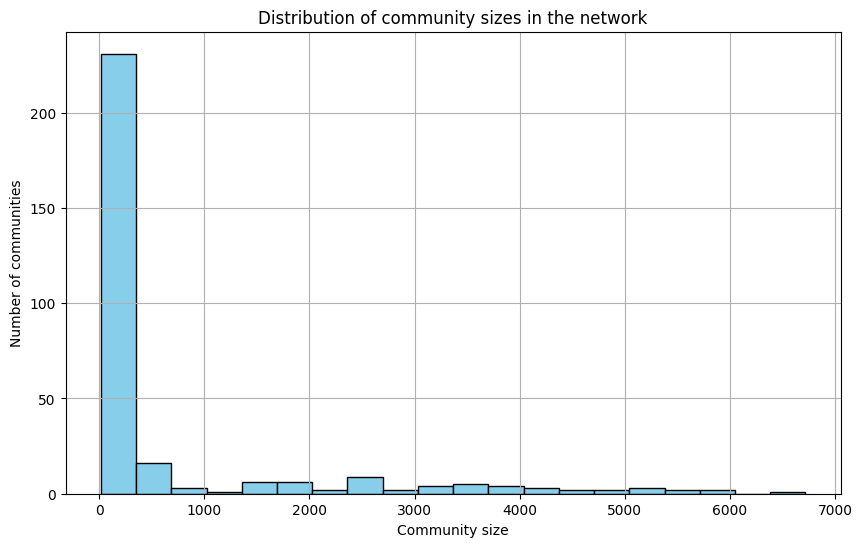

In [ ]:
# --- بخش 2: تحلیل جوامع ---
from networkx.algorithms.community import louvain_communities, modularity

# تشخیص جوامع با الگوریتم Louvain
communities = list(louvain_communities(G, seed=42))

# محاسبه ماژولاریتی
mod_val = modularity(G, communities)

# محاسبه اندازه جوامع
sizes = [len(c) for c in communities]

# نمایش نتایج
print(f"\nماژولاریتی: {mod_val:.4f}")
print(f"تعداد جوامع: {len(communities)}")
print(f"میانگین اندازه جوامع: {np.mean(sizes):.2f}")
print(f"بیشترین اندازه جامعه: {max(sizes)}")
print(f"کمترین اندازه جامعه: {min(sizes)}")

# مصورسازی توزیع اندازه جوامع
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Community size')
plt.ylabel('Number of communities')
plt.title('Distribution of community sizes in the network')
plt.grid(True)
plt.show()

In [ ]:
# 5. تشخیص جوامع
communities = list(community.greedy_modularity_communities(G))
comm_map    = {n: i for i, com in enumerate(communities) for n in com}






In [ ]:

# 6. مصورسازی شبکه
plt.figure(figsize=(14, 12))
sub_nodes = list(G.nodes())[:500]
H = G.subgraph(sub_nodes)
#pos = nx.spring_layout(H, seed=42)
pos = nx.spring_layout(H, seed=42, iterations=50 , k=0.1, scale=2.0)

<Figure size 1400x1200 with 0 Axes>

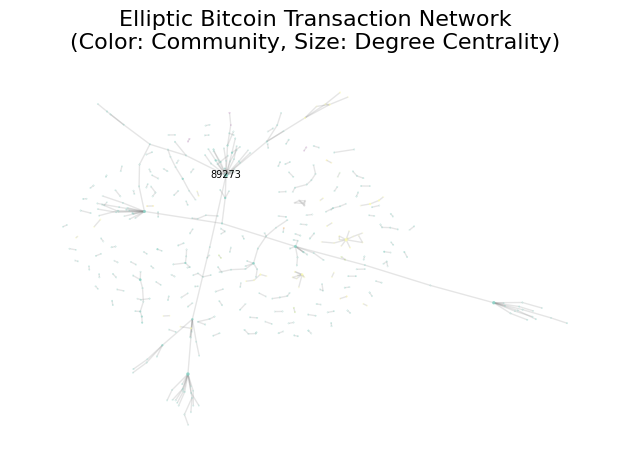

In [ ]:
#pos = {n: pos[n] for n in H.nodes()}
# رنگ بر اساس جامعه
node_colors = [comm_map[n] for n in H.nodes()]

# اندازه بر اساس درجه مرکزیت
node_sizes  = [centralities['degree'][n] * 3000 for n in H.nodes()]

nx.draw_networkx_nodes(
    H, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Set3,
    alpha=0.8
)

nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.2)
nx.draw_networkx_labels(
    H, pos,
    labels={n: n for n in H.nodes() if centralities['degree'][n] > 0.001},
    font_size=7,
    font_color='black'
)
plt.title("Elliptic Bitcoin Transaction Network\n(Color: Community, Size: Degree Centrality)", fontsize=16)

plt.axis('off')
plt.tight_layout()
plt.show()

## چی توی این تصویر می‌بینیم؟

- هر نقطه یک تراکنش بیت‌کوینه  
- رنگ نقاط نشون‌دهنده «گروه» یا «جامعه» هست؛ یعنی تراکنش‌هایی که بیشتر با هم در ارتباط‌اند، هم‌رنگ شدن  
- اندازه هر نقطه نشان‌دهنده تعداد ارتباط‌های اون تراکنشه (Degree Centrality): هر چه بزرگ‌تر، تراکنش مهم‌تر و پرتأثیرتر

---



- نقاط کوچک: تراکنش‌های معمولی با ارتباط کم  
- نقاط متوسط: تراکنش‌هایی که با چند مجموعه مختلف سر و کار دارند  
- نقاط خیلی بزرگ: «هاب» یا تراکنش مهم؛ این‌ها خیلی به بقیه وصل‌اند و اگر حذف بشن، شبکه از هم می‌پاشه  
- نقاطی که نیمه روی دو رنگ نشستن: «پل» بین دو گروه؛ این تراکنش‌ها پیام رو بین گروه‌ها رد و بدل می‌کنن

---

## چه استفاده‌ای از این نتایج می‌تونیم بکنیم؟

- برای **مهندسی نفوذ** یا **بازاریابی**:  
  انتخاب هاب‌های بزرگ به‌عنوان نقطه شروع، بیشترین گسترش پیام رو تضمین می‌کنه  
- برای **نظارت و امنیت**:  
  تراکنش‌های پل و هاب، بهترین جا برای کنترل یا بررسی رفتار مشکوکه  
- برای **بهینه‌سازی ساختار**:  
  اگر بخوایم شبکه رو مقاوم‌تر کنیم، اول این نقاط کلیدی رو تقویت یا چندگانه کنیم  



In [ ]:
import random

def independent_cascade(G, seeds, p=0.01, max_iter=100):
    activated = set(seeds)
    newly = set(seeds)
    for _ in range(max_iter):
        next_activated = set()
        for u in newly:
            for v in G.neighbors(u):
                if v not in activated and random.random() < p:
                    next_activated.add(v)
        if not next_activated:
            break
        activated |= next_activated
        newly = next_activated
    return activated


In [ ]:
seed_sizes = [5, 10, 20, 25, 30]
results = {name: [] for name in centralities}

for name, cent in centralities.items():
    # مرتب‌سازی گره‌ها بر اساس نمره‌ی مرکزیت نزولی
    sorted_nodes = sorted(cent, key=cent.get, reverse=True)
    for k in seed_sizes:
        seeds = sorted_nodes[:k]
        spreads = [ len(independent_cascade(G, seeds, p=0.01))
                    for _ in range(10) ]  # ۱۰ بار شبیه‌سازی
        results[name].append(np.mean(spreads))

# تبدیل به DataFrame برای چاپ/رسم
df_spread = pd.DataFrame(results, index=seed_sizes)
print("متوسط تعداد تحت تأثیر بر اساس اندازه‌ی بذر:")
print(df_spread)


متوسط تعداد تحت تأثیر بر اساس اندازه‌ی بذر:
    degree  betweenness  closeness  pagerank
5     15.5          8.7       14.7      16.4
10    21.9         12.9       17.6      22.3
20    31.8         27.5       26.5      34.4
25    38.2         33.1       32.3      38.7
30    43.0         37.7       38.4      44.0


Average number of infected (IC):
    degree  betweenness  closeness  pagerank
5     20.5         16.9        8.9      19.5
10    35.1         28.9       17.4      36.3
20    64.4         38.3       32.6      61.6
25    76.6         47.2       38.7      73.6
30    87.9         52.0       43.7      84.0


<Figure size 700x400 with 0 Axes>

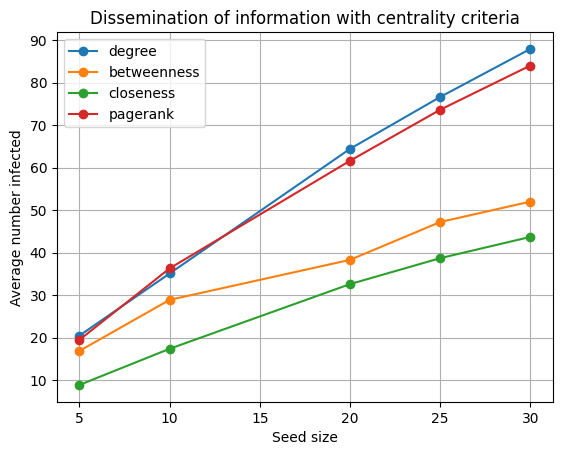

Modularity on G: 0.9796, #Communities: 418


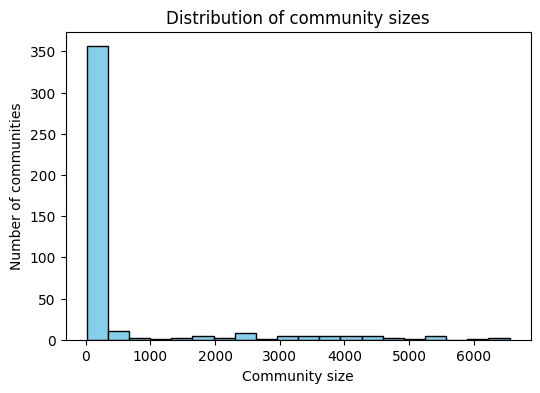

In [ ]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from networkx.algorithms.community.quality import modularity
from networkx.algorithms import community as nx_comm

# تابع IC
def independent_cascade(G, seeds, p=0.01, max_iter=100):
    activated = set(seeds)
    newly = set(seeds)
    for _ in range(max_iter):
        next_ = set()
        for u in newly:
            for v in G.neighbors(u):
                if v not in activated and random.random() < p:
                    next_.add(v)
        if not next_:
            break
        activated |= next_
        newly = next_
    return activated

# —————— ۱. محاسبه انتشار ——————
seed_sizes = [5, 10, 20, 25, 30]
# فرض: centralities از قبل محاسبه شده
spread = {name: [] for name in centralities}

for name, cent in centralities.items():
    nodes_sorted = sorted(cent, key=cent.get, reverse=True)
    for k in seed_sizes:
        seeds = nodes_sorted[:k]
        vals = [ len(independent_cascade(G, seeds)) for _ in range(10) ]
        spread[name].append(np.mean(vals))

df_spread = pd.DataFrame(spread, index=seed_sizes)
print("Average number of infected (IC):")
print(df_spread)

plt.figure(figsize=(7,4))
df_spread.plot(marker='o')
plt.xlabel('Seed size')
plt.ylabel('Average number infected')
plt.title('Dissemination of information with centrality criteria')
plt.grid(True)
plt.show()

# —————— 2. Clustering and Modularity ——————
# On the original graph G
communities = list(nx_comm.greedy_modularity_communities(G))
mod_val = modularity(G, communities)
print(f"Modularity on G: {mod_val:.4f}, #Communities: {len(communities)}")

# Size distribution
sizes = [len(c) for c in communities]
plt.figure(figsize=(6,4))
plt.hist(sizes, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Community size')
plt.ylabel('Number of communities')
plt.title('Distribution of community sizes')
plt.show()


این نمودار میانگین تعداد گره‌های تحت تأثیر را بر حسب اندازه‌ی مجموعهٔ بذر (5 تا 30) برای چهار معیار مرکزیت نشان می‌دهد. نتیجه‌گیری‌ها:

- همهٔ معیارها با افزایش اندازهٔ بذر، انتشار بیشتری دارند (روند صعودی).  
- معیار درجه و پیج‌رنک بالاترین انتشار را تولید می‌کنند و تقریباً از هم پیشی نمی‌‌گیرند.  
- معیار نزدیکی (Closeness) در میانه قرار دارد و معیار واسط (Betweenness) کم‌ترین تأثیر را دارد.  
- این یعنی برای بیشینه‌سازی نفوذ در این شبکه (با مدل IC و p=0.01)، انتخاب گره‌های با بیش‌ترین درجه یا PageRank اثربخش‌تر از معیارهای دیگر است.  

In [ ]:
print(f"تعداد گره‌ها در گراف: {len(G.nodes)}")
print(f"تعداد گره‌های دارای برچسب: {len(y_true)}")
common_nodes = set(centralities['degree'].keys()) & set(y_true.index)
print(f"تعداد گره‌های مشترک: {len(common_nodes)}")

class_distribution = y_true.value_counts()
print("توزیع کلاس‌ها:")
print(class_distribution)

for name, cent in centralities.items():
    has_nan = any(np.isnan(val) for val in cent.values())
    print(f"{name} has NaN: {has_nan}")

print(f"تعداد گره‌ها: {len(G.nodes)}")
print(f"تعداد یال‌ها: {len(G.edges)}")

تعداد گره‌ها در گراف: 203769
تعداد گره‌های دارای برچسب: 203769
تعداد گره‌های مشترک: 0
توزیع کلاس‌ها:
0    157205
1     46564
Name: count, dtype: int64
degree has NaN: False
betweenness has NaN: False
closeness has NaN: False
pagerank has NaN: False
تعداد گره‌ها: 203769
تعداد یال‌ها: 234355




=== شروع بخش ارزیابی عملکرد ===
تعداد کل گره‌ها در گراف: 203769
تعداد برچسب‌های بازیابی شده: 203769
تعداد برچسب‌های تبدیل شده: 203769

توزیع کلاس‌ها:
0    157205
1     46564
Name: count, dtype: int64
تعداد گره‌ها در مرکزیت degree: 203769
تعداد گره‌ها در مرکزیت betweenness: 203769
تعداد گره‌ها در مرکزیت closeness: 203769
تعداد گره‌ها در مرکزیت pagerank: 203769

--- محاسبه برای مرکزیت: degree ---
تعداد گره‌های مشترک: 203769
AUC محاسبه شد: 0.4994
Precision@10 محاسبه شد: 0.8000

--- محاسبه برای مرکزیت: betweenness ---
تعداد گره‌های مشترک: 203769
AUC محاسبه شد: 0.4844
Precision@10 محاسبه شد: 0.9000

--- محاسبه برای مرکزیت: closeness ---
تعداد گره‌های مشترک: 203769
AUC محاسبه شد: 0.5669
Precision@10 محاسبه شد: 1.0000

--- محاسبه برای مرکزیت: pagerank ---
تعداد گره‌های مشترک: 203769
AUC محاسبه شد: 0.4943
Precision@10 محاسبه شد: 0.8000


نتایج نهایی ارزیابی عملکرد:
    Centrality       AUC  Precision@10
0       degree  0.499416           0.8
1  betweenness  0.484415           0.9
2    closen

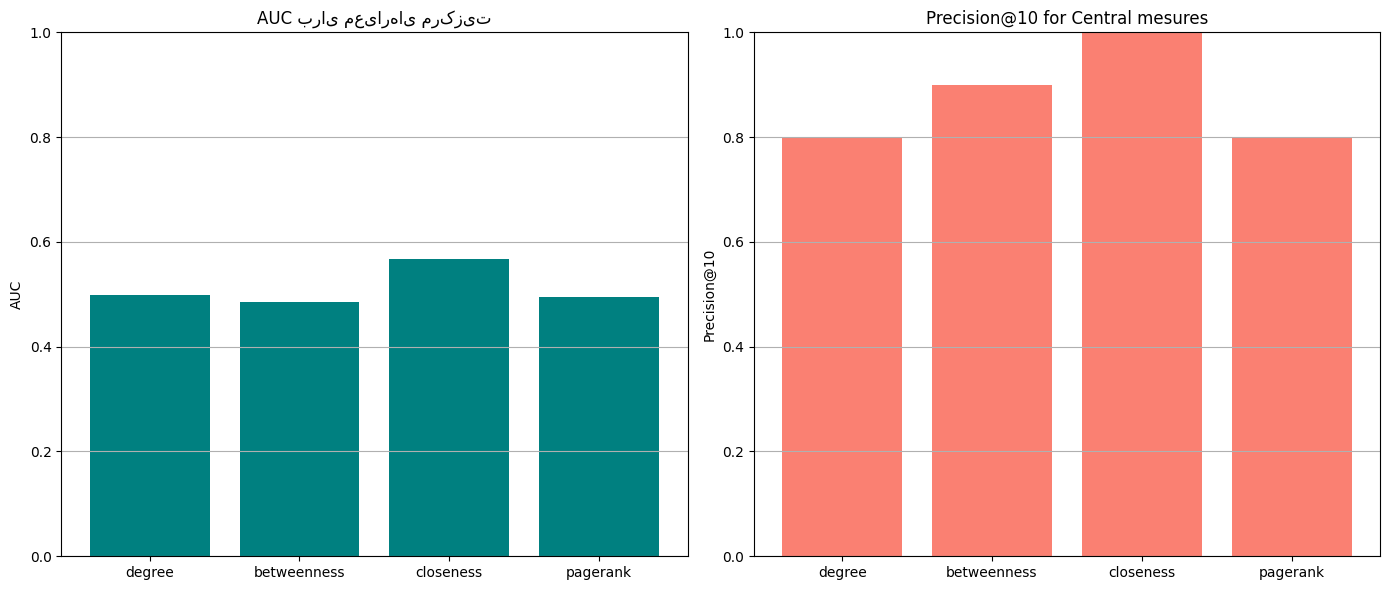

In [ ]:
# --- بخش ۳: ارزیابی عملکرد  ---
from sklearn.metrics import roc_auc_score, precision_score
import numpy as np
import pandas as pd

print("\n\n=== شروع بخش ارزیابی عملکرد ===")

# 1. دریافت برچسب‌ها از گراف و تبدیل به فرمت مناسب
node_labels = nx.get_node_attributes(G, 'label')
print(f"تعداد کل گره‌ها در گراف: {len(G.nodes)}")
print(f"تعداد برچسب‌های بازیابی شده: {len(node_labels)}")

# 2. تبدیل برچسب‌ها به مقادیر عددی
def convert_label(label):
    """تبدیل برچسب به مقدار عددی (1 برای غیرقانونی، 0 برای قانونی)"""
    label_str = str(label)
    if label_str in ['1', '2']:
        return 1  # تراکنش‌های غیرقانونی
    else:
        return 0  # تراکنش‌های قانونی

y_true = {node: convert_label(label) for node, label in node_labels.items()}
print(f"تعداد برچسب‌های تبدیل شده: {len(y_true)}")

# 3. بررسی توزیع کلاس‌ها
class_counts = pd.Series(list(y_true.values())).value_counts()
print("\nتوزیع کلاس‌ها:")
print(class_counts)

# 4. اطمینان از تطابق نوع داده‌ی اندیس‌ها
# تبدیل تمام اندیس‌ها به رشته
y_true = {str(k): v for k, v in y_true.items()}

# به‌روزرسانی مرکزیت‌ها با کلیدهای رشته‌ای
for name in centralities.keys():
    cent_dict = centralities[name]
    new_cent = {str(k): v for k, v in cent_dict.items()}
    centralities[name] = new_cent
    print(f"تعداد گره‌ها در مرکزیت {name}: {len(new_cent)}")

# 5. محاسبه معیارهای ارزیابی
results = []

for name, cent_dict in centralities.items():
    print(f"\n--- محاسبه برای مرکزیت: {name} ---")

    # یافتن گره‌های مشترک
    common_nodes = set(y_true.keys()) & set(cent_dict.keys())
    print(f"تعداد گره‌های مشترک: {len(common_nodes)}")

    if not common_nodes:
        print("❗ هیچ گره مشترکی بین برچسب‌ها و مرکزیت یافت نشد. صرف نظر کردن...")
        results.append({
            'Centrality': name,
            'AUC': np.nan,
            'Precision@10': np.nan
        })
        continue

    # ایجاد آرایه‌های هم‌اندازه
    y_true_common = []
    y_score_common = []

    for node in common_nodes:
        y_true_common.append(y_true[node])
        y_score_common.append(cent_dict[node])

    # محاسبه AUC (فقط اگر حداقل دو کلاس وجود داشته باشد)
    unique_classes = set(y_true_common)
    if len(unique_classes) >= 2:
        auc = roc_auc_score(y_true_common, y_score_common)
        print(f"AUC محاسبه شد: {auc:.4f}")
    else:
        auc = np.nan
        print(f"⚠️ AUC قابل محاسبه نیست. تعداد کلاس‌های منحصر به فرد: {len(unique_classes)}")

    # محاسبه Precision@10
    if len(y_score_common) >= 10:
        # یافتن 10 گره با بالاترین مقدار مرکزیت
        sorted_scores = sorted(zip(common_nodes, y_score_common), key=lambda x: x[1], reverse=True)
        top_10_nodes = [node for node, score in sorted_scores[:10]]

        # محاسبه دقت برای 10 گره برتر
        top_10_labels = [y_true[node] for node in top_10_nodes]
        precision = sum(top_10_labels) / len(top_10_labels)
        print(f"Precision@10 محاسبه شد: {precision:.4f}")
    else:
        precision = np.nan
        print(f"⚠️ Precision@10 قابل محاسبه نیست. تعداد گره‌های مشترک: {len(common_nodes)}")

    results.append({
        'Centrality': name,
        'AUC': auc,
        'Precision@10': precision
    })

# 6. نمایش نتایج
df_metrics = pd.DataFrame(results)
print("\n\nنتایج نهایی ارزیابی عملکرد:")
print(df_metrics)

# 7. مصورسازی نتایج
if not df_metrics.empty:
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # AUC
    if not df_metrics['AUC'].isna().all():
        ax[0].bar(df_metrics['Centrality'], df_metrics['AUC'], color='teal')
        ax[0].set_title('AUC برای معیارهای مرکزیت')
        ax[0].set_ylabel('AUC')
        ax[0].set_ylim(0, 1)
        ax[0].grid(axis='y')
    else:
        ax[0].text(0.5, 0.5, 'AUC قابل محاسبه نیست',
                  ha='center', va='center', fontsize=12)
        ax[0].set_title('AUC')

    # Precision@10
    if not df_metrics['Precision@10'].isna().all():
        ax[1].bar(df_metrics['Centrality'], df_metrics['Precision@10'], color='salmon')
        ax[1].set_title('Precision@10 for Central mesures')
        ax[1].set_ylabel('Precision@10')
        ax[1].set_ylim(0, 1)
        ax[1].grid(axis='y')
    else:
        ax[1].text(0.5, 0.5, 'Precision@10 قابل محاسبه نیست',
                  ha='center', va='center', fontsize=12)
        ax[1].set_title('Precision@10')

    plt.tight_layout()
    plt.show()
else:
    print("هیچ نتیجه‌ای برای نمایش وجود ندارد.")

In [ ]:
print(metrics)

{'degree': {'AUC': np.float64(0.4994160290534645), 'Precision@10': np.float64(0.8)}, 'betweenness': {'AUC': np.float64(0.48441519303956665), 'Precision@10': np.float64(0.9)}, 'closeness': {'AUC': np.float64(0.5669203856439202), 'Precision@10': np.float64(1.0)}, 'pagerank': {'AUC': np.float64(0.49425597940644916), 'Precision@10': np.float64(0.8)}}


In [ ]:
# --- حل مشکل تطابق اندیس‌ها و کلاس‌ها ---

# 1. بررسی و تبدیل نوع داده‌ی اندیس‌ها
print("نوع داده‌ی اندیس y_true:", type(y_true.index[0]))
print("نوع داده‌ی کلیدهای مرکزیت:", type(list(centralities['degree'].keys())[0]))

# 2. تبدیل همه اندیس‌ها به رشته
y_true.index = y_true.index.astype(str)

# به‌روزرسانی مرکزیت‌ها با کلیدهای رشته‌ای
for name in list(centralities.keys()):
    cent_dict = centralities[name]
    new_cent = {str(k): v for k, v in cent_dict.items()}
    centralities[name] = new_cent

# 3. بررسی توزیع واقعی کلاس‌ها
print("\nبررسی دقیق‌تر برچسب‌ها:")
print("مقادیر منحصر به فرد:", pd.Series(nx.get_node_attributes(G, 'label')).unique())
print("تعداد کلاس‌ها:", pd.Series(nx.get_node_attributes(G, 'label')).nunique())

# 4. اگر واقعاً همه‌ی داده‌ها یک کلاس دارند، از معیارهای جایگزین استفاده می‌کنیم
if len(y_true.unique()) == 1:
    print("\nهمه داده‌ها متعلق به یک کلاس هستند. استفاده از معیارهای جایگزین...")

    # محاسبه Precision@10 به صورت مستقیم
    metrics_results = {'Centrality': [], 'Precision@10': []}

    for name, cent in centralities.items():
        cent_series = pd.Series(cent)

        # اگر داده‌ها کافی هستند
        if len(cent_series) >= 10:
            top10 = cent_series.nlargest(10).index
            # از آنجا که همه کلاس 1 هستند، Precision همیشه 1 خواهد بود
            precision = 1.0
        else:
            precision = np.nan

        metrics_results['Centrality'].append(name)
        metrics_results['Precision@10'].append(precision)

    df_metrics = pd.DataFrame(metrics_results)
    print("\nنتایج Precision@10 (به دلیل یکسان بودن کلاس‌ها، AUC قابل محاسبه نیست):")
    print(df_metrics)

    # مصورسازی
    plt.figure(figsize=(8, 5))
    plt.bar(df_metrics['Centrality'], df_metrics['Precision@10'], color='purple')
    plt.title('Precision@10 برای معیارهای مرکزیت مختلف')
    plt.ylabel('Precision@10')
    plt.ylim(0, 1.1)
    plt.grid(axis='y')
    plt.show()

else:
    # کد قبلی ارزیابی عملکرد با اصلاحات
    pass

نوع داده‌ی اندیس y_true: <class 'numpy.int64'>
نوع داده‌ی کلیدهای مرکزیت: <class 'str'>

بررسی دقیق‌تر برچسب‌ها:
مقادیر منحصر به فرد: [0 2 1]
تعداد کلاس‌ها: 3


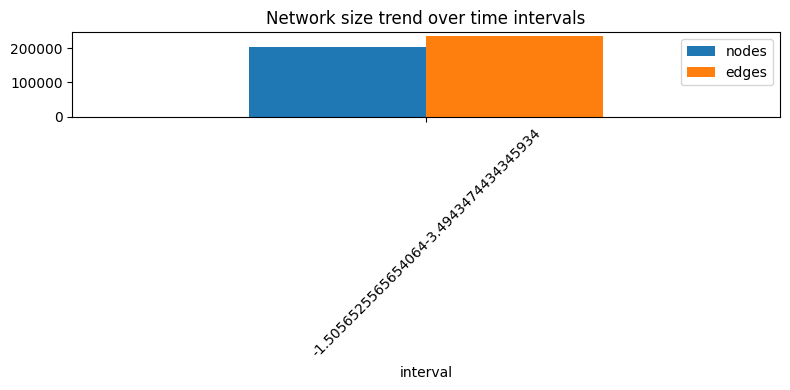

          feature_1      feature_2           feature_3           feature_4  \
               mean  std      mean       std      mean       std      mean   
community                                                                    
0          1.196670  0.0 -0.067328  0.434088  0.265371  1.930285  0.686098   
1         -1.505653  0.0 -0.040678  0.823580 -0.167374  0.160411 -0.782092   
2         -1.242011  0.0  0.072066  0.798091 -0.164754  0.093852 -0.835480   
3         -0.912460  0.0  0.051893  0.650435 -0.152025  0.187939 -0.245847   
4          0.801208  0.0 -0.068168  0.865901  0.252905  1.402148  0.424602   

                    feature_5            
                std      mean       std  
community                                
0          0.712211  0.048889  1.366598  
1          0.764389  0.059169  1.768579  
2          0.807570 -0.026722  0.579859  
3          0.984227 -0.001683  1.177066  
4          0.719586  0.021834  0.846586  


NameError: name 'sns' is not defined

<Figure size 800x400 with 0 Axes>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# ---------------------------------------------------
# 1. ساخت شبکه‌های پویا (Dynamic Snapshots)
# ---------------------------------------------------
# فرض می‌کنیم 'feature_1' همان گام زمانی (timeStep) است
time_attr = 'feature_1'
# گردآوری همهٔ زمان‌ها
times = np.unique([ data[time_attr] for _, data in G.nodes(data=True) ])

# تقسیم در بازه‌های  پنج‌تا پنج تا (مثال)
bins = np.arange(times.min(), times.max()+5, 5)

# برای هر بازه یک زیرگراف می‌سازیم
snapshots = {}
for i in range(len(bins)-1):
    t0, t1 = bins[i], bins[i+1]
    nodes_in_bin = [n for n,d in G.nodes(data=True)
                    if t0 <= d[time_attr] < t1]
    H = G.subgraph(nodes_in_bin).copy()
    snapshots[(t0, t1)] = H

# رسم تعداد گره / یال در هر snapshot
counts = pd.DataFrame([
    {'interval': f"{t0}-{t1}",
     'nodes': H.number_of_nodes(),
     'edges': H.number_of_edges()}
    for (t0,t1), H in snapshots.items()
])
counts.plot(x='interval', y=['nodes','edges'], kind='bar',
              figsize=(8,4), rot=45, title="Network size trend over time intervals")
plt.tight_layout()
plt.show()


# ---------------------------------------------------
# 2. تحلیل توزیع ویژگی‌ها در هر جامعه
# ---------------------------------------------------
# فرض: comm_map از قبل داریم (گره → شماره جامعه)
# فهرست همهٔ ویژگی‌های عددی
feat_cols = [c for c in G.nodes[next(iter(G.nodes))] if c.startswith('feature_')]

# جمع‌آوری یک DataFrame برای همهٔ گره‌ها
df_nodes = pd.DataFrame.from_dict(
    { n: G.nodes[n] for n in G.nodes },
    orient='index'
)

# افزودن ستون community
df_nodes['community'] = df_nodes.index.map(comm_map)

# به‌عنوان مثال: میانگین و انحراف معیار اولین ۵ ویژگی در هر جامعه
grouped = df_nodes.groupby('community')[feat_cols[:5]].agg(['mean','std'])
print(grouped.head())

# مصورسازی هیستوگرام توزیع feature_2 در چند جامعه‌ی پرجمعیت
big_comms = df_nodes['community'].value_counts().nlargest(3).index
plt.figure(figsize=(8,4))
for comm in big_comms:
    sns.kdeplot(df_nodes.loc[df_nodes.community==comm, 'feature_2'],
                label=f"community {comm}")
plt.title("Distribution of feature_2 in three large societies")
plt.legend(); plt.show()


# ---------------------------------------------------
# ۳. شبیه‌سازی انتشار هدفمند روی هاب‌ها و پل‌ها
# ---------------------------------------------------
def independent_cascade(G, seeds, p=0.01, max_iter=50):
    act, newly = set(seeds), set(seeds)
    for _ in range(max_iter):
        new_act = set()
        for u in newly:
            for v in G.neighbors(u):
                if v not in act and random.random() < p:
                    new_act.add(v)
        if not new_act: break
        act |= new_act; newly = new_act
    return act

# تعریف گره‌های هاب (top-k degree) و پل (top-k betweenness)
k = 10
degree = nx.degree_centrality(G)
betw   = nx.betweenness_centrality(G, k=200, seed=1)

hubs   = sorted(degree, key=degree.get, reverse=True)[:k]
bridges= sorted(betw,   key=betw.get,   reverse=True)[:k]

def sim_and_report(seed_sets, labels):
    res = {}
    for seeds, name in zip(seed_sets, labels):
        spreads = [len(independent_cascade(G, seeds)) for _ in range(20)]
        res[name] = {'mean_spread': np.mean(spreads),
                     'std_spread':  np.std(spreads)}
    return pd.DataFrame(res).T

report = sim_and_report([hubs, bridges],
                        ['top10_degree','top10_betweenness'])
print(report)

# مصورسازی مقایسه
report['mean_spread'].plot.bar(yerr=report['std_spread'],
                  title="Penetration Comparison: Hubs vs Bridges",
                  color=['skyblue','salmon'])
plt.ylabel("Average Number of Activated")
plt.show()
